In [13]:
from IPython.lib.display import YouTubeVideo
import warnings
warnings.filterwarnings('ignore')

# Roadmap para futuros estudos

## Literatura

1. [Deep Learning with Python - François Chollet](https://www.amazon.com.br/Deep-Learning-Python-Francois-Chollet/dp/1617294438)
2. [Redes Neurais: Princípios e Prática - Simon Haykin](https://www.amazon.com.br/Redes-Neurais-Princ%C3%ADpios-Simon-Haykin/dp/8573077182)
3. [Deep Learning - Goodfellow; Bengio; Courville](https://www.amazon.com.br/Deep-Learning-Ian-Goodfellow/dp/0262035618)
4. [Neural Networks and Deep Learning - Michael Nielsen](http://neuralnetworksanddeeplearning.com/index.html)

## Apoio

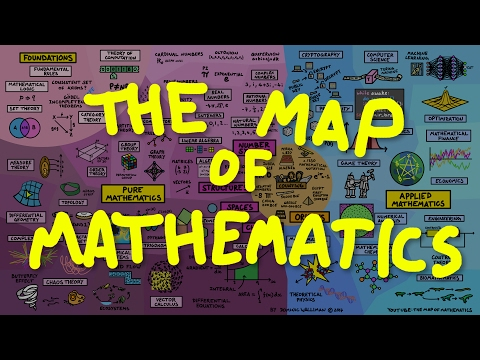

In [14]:
YouTubeVideo('OmJ-4B-mS-Y', width=1024, height=590)

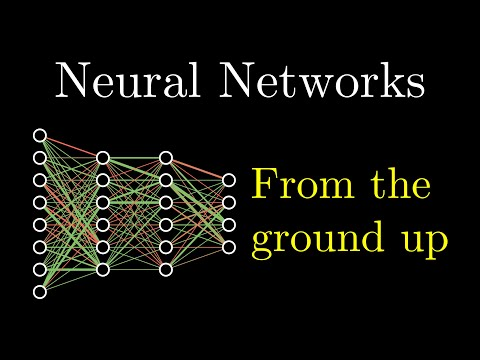

In [15]:
YouTubeVideo('aircAruvnKk', width=1024, height=590)

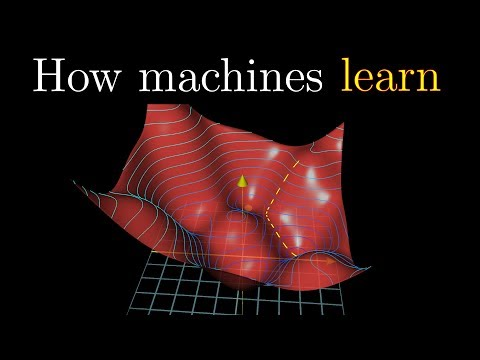

In [16]:
YouTubeVideo('IHZwWFHWa-w', width=1024, height=590)

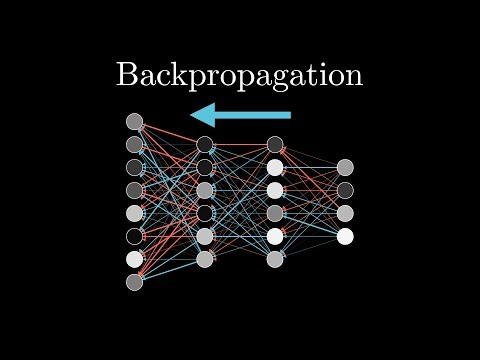

In [17]:
YouTubeVideo('Ilg3gGewQ5U', width=1024, height=590)

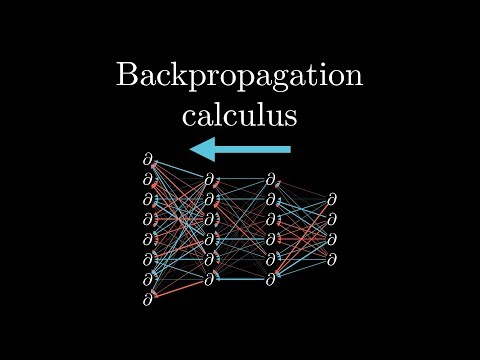

In [18]:
YouTubeVideo('tIeHLnjs5U8', width=1024, height=590)

In [19]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D, Conv2D
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import cv2
import numpy as np

In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
nb_classes = 10

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

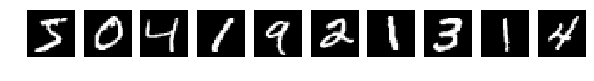

In [21]:
plt.figure(figsize=(10, 10))

for i in range(10):

    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(X_train[i], cv2.COLOR_GRAY2RGB))

plt.show()

In [22]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [23]:
nb_filters = 32
kernel_size = (3, 3)
pool_size = (2, 2)

model = Sequential()

model.add(Conv2D(nb_filters, kernel_size, padding='same', input_shape=input_shape, activation='relu', name='Conv2DLayer1'))
model.add(Conv2D(nb_filters, kernel_size, padding='same',activation='relu', name='Conv2DLayer2'))
model.add(MaxPooling2D(pool_size=pool_size, padding="same", name='MaxPoolLayer3'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=128, activation='relu', name='DenseLayer4'))
model.add(Dropout(0.5))
model.add(Dense(units=nb_classes, activation='softmax', name='OutputLayer4'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2DLayer1 (Conv2D)        (None, 28, 28, 32)        320       
_________________________________________________________________
Conv2DLayer2 (Conv2D)        (None, 28, 28, 32)        9248      
_________________________________________________________________
MaxPoolLayer3 (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
DenseLayer4 (Dense)          (None, 128)               802944    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [24]:
epochs = 5

checkpoint = ModelCheckpoint(filepath='model.hdf5', monitor='val_acc', verbose=True, save_best_only=True)

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=128, validation_split=0.1, verbose=1, callbacks=[checkpoint])

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
53888/54000 [============================>.] - ETA: 0s - loss: 0.3032 - acc: 0.9067
Epoch 00001: val_acc improved from -inf to 0.98267, saving model to model.hdf5
54000/54000 [==============================] - 30s 554us/sample - loss: 0.3030 - acc: 0.9068 - val_loss: 0.0653 - val_acc: 0.9827
Epoch 2/5
53888/54000 [============================>.] - ETA: 0s - loss: 0.1052 - acc: 0.9683
Epoch 00002: val_acc improved from 0.98267 to 0.98700, saving model to model.hdf5
54000/54000 [==============================] - 29s 546us/sample - loss: 0.1053 - acc: 0.9683 - val_loss: 0.0482 - val_acc: 0.9870
Epoch 3/5
53888/54000 [============================>.] - ETA: 0s - loss: 0.0774 - acc: 0.9760
Epoch 00003: val_acc improved from 0.98700 to 0.98800, saving model to model.hdf5
54000/54000 [==============================] - 30s 551us/sample - loss: 0.0773 - acc: 0.9760 - val_loss: 0.0408 - val_acc: 0.9880
Epoch 4/5
53888/54000 [=============

In [25]:
model.load_weights('model.hdf5')

In [26]:
model.save('model.h5')

In [27]:
model.layers[:3]

In [28]:
output_camadas = [camada.output for camada in model.layers[:3]]

In [29]:
activations = Model(inputs=model.input, outputs=output_camadas)

In [30]:
# Código adaptado de Deep Learning With Python; François Chollet; Pg 164
def model_layers_output(imagem):

    activations_output = activations.predict([[imagem]])
    
    layers = list()
    
    for layer in model.layers[:3]:
        layers.append(layer.name)

    grid_imgs = 16

    for layer_name, activation_output in zip(layers, activations_output):
        features = activation_output.shape[-1]
        activation_size = activation_output.shape[1]
        numb_cols = features // grid_imgs
        display_grid = np.zeros((activation_size * numb_cols, grid_imgs * activation_size))
        
        for col in range(numb_cols):
            for row in range(grid_imgs):
                heatmap = activation_output[0, :, :, col * grid_imgs + row]
                heatmap -= heatmap.mean()
                heatmap /= heatmap.std()
                heatmap *= 64
                heatmap += 128
                heatmap = np.clip(heatmap, 0, 255)
                display_grid[col * activation_size : (col + 1) * activation_size, row * activation_size : (row + 1) * activation_size] = heatmap
                
        scale = 1. / activation_size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.axis('off')
        plt.imshow(display_grid, aspect='auto')

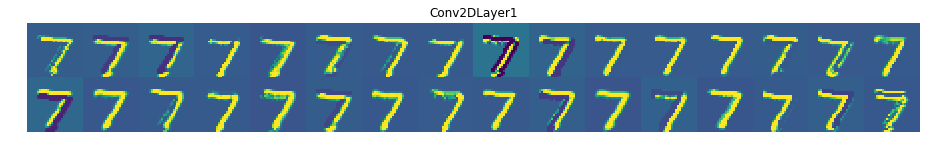

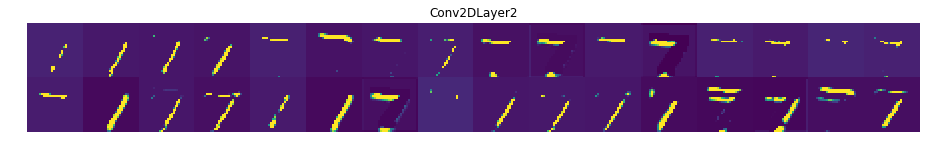

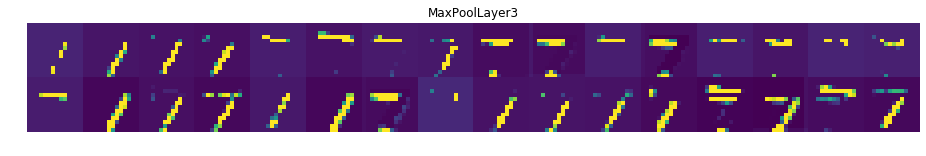

In [31]:
model_layers_output(X_test[0])

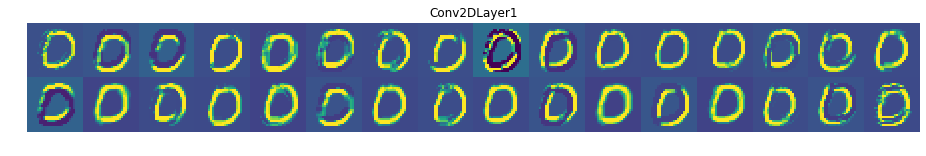

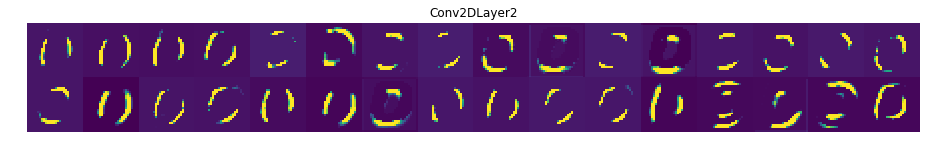

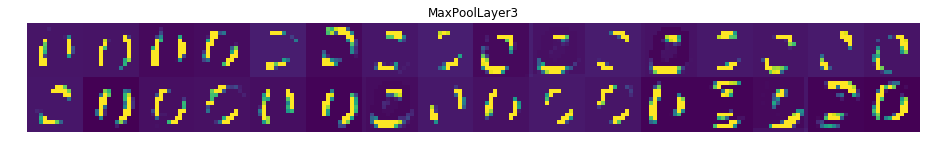

In [32]:
model_layers_output(X_test[10])

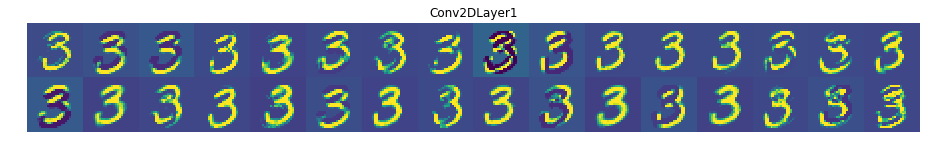

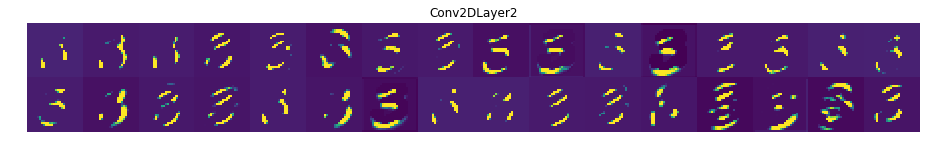

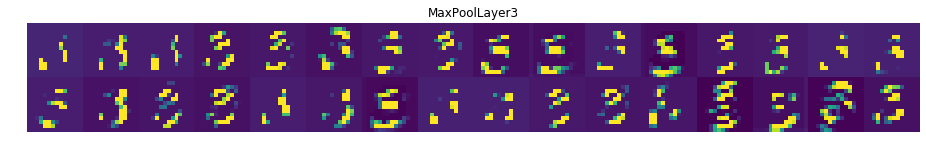

In [33]:
model_layers_output(X_test[90])

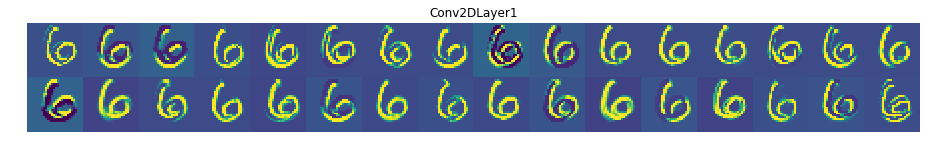

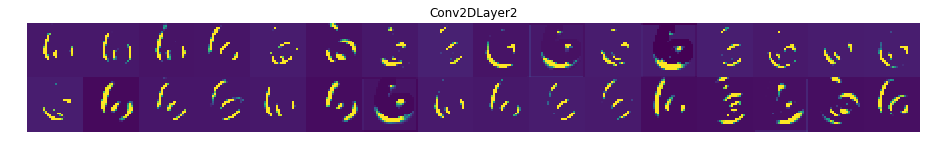

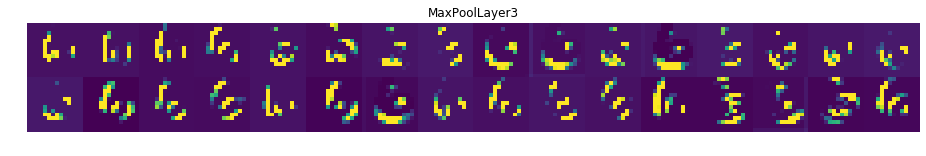

In [34]:
model_layers_output(X_test[100])